# Transforms on Data Part III

In this notebook we continue exploring data transforms. Here we take a look at another linear transform before moving on to look at a few *nonlinear* transforms.

The linear transform we will look at is principal component analysis (PCA). PCA projects data from a high dimensional space to a low dimensional space that captures most of the useful information in the original high dimensional space.

Like the Fourier transform, will use PCA as a tool in this course and in this case we will let `scikit-learn` take care of the details of its implementation. It is useful to understand at a high level how PCA works though.

PCA works by factoring a matrix using a technique called a singular value decomposition (SVD).

For an original matrix $X$, where rows are samples and columns are features, an SVD will factor it as

$$
X = U \Sigma W^T
$$




In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Projection and Principal Component Analysis (PCA)

PCA is a useful tool for reducing several features to a smaller number of features which capture most of the information in the larger number of features. This can help us visualize high dimensional data, and help us to make more efficient classification and predictive models which make inferences from fewer variables. We start by using PCA through scikit-learn.

In [2]:
import pandas as pd
from sklearn.decomposition import PCA

# Load the iris data
iris_df = pd.read_csv(
    "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
)

# Extract a feature matrix and perform PCA
iris_features = iris_df[
    ["sepal_length", "sepal_width", "petal_length", "petal_width"]
].to_numpy()
pca_model = PCA(n_components=4, svd_solver="full")
pca_model.fit(iris_features)

PCA(n_components=4, svd_solver='full')

In [3]:
# Add PCA features to DataFrame
pca_features = pca_model.transform(iris_features)

iris_df[["PCA 1", "PCA 2"]] = pca_features[:, :2]

iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,PCA 1,PCA 2
0,5.1,3.5,1.4,0.2,setosa,-2.684207,0.326607
1,4.9,3.0,1.4,0.2,setosa,-2.715391,-0.169557
2,4.7,3.2,1.3,0.2,setosa,-2.889820,-0.137346
3,4.6,3.1,1.5,0.2,setosa,-2.746437,-0.311124
4,5.0,3.6,1.4,0.2,setosa,-2.728593,0.333925
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944017,0.187415
146,6.3,2.5,5.0,1.9,virginica,1.525664,-0.375021
147,6.5,3.0,5.2,2.0,virginica,1.764046,0.078519
148,6.2,3.4,5.4,2.3,virginica,1.901629,0.115877


Text(0.5, 0.98, 'Iris Features')

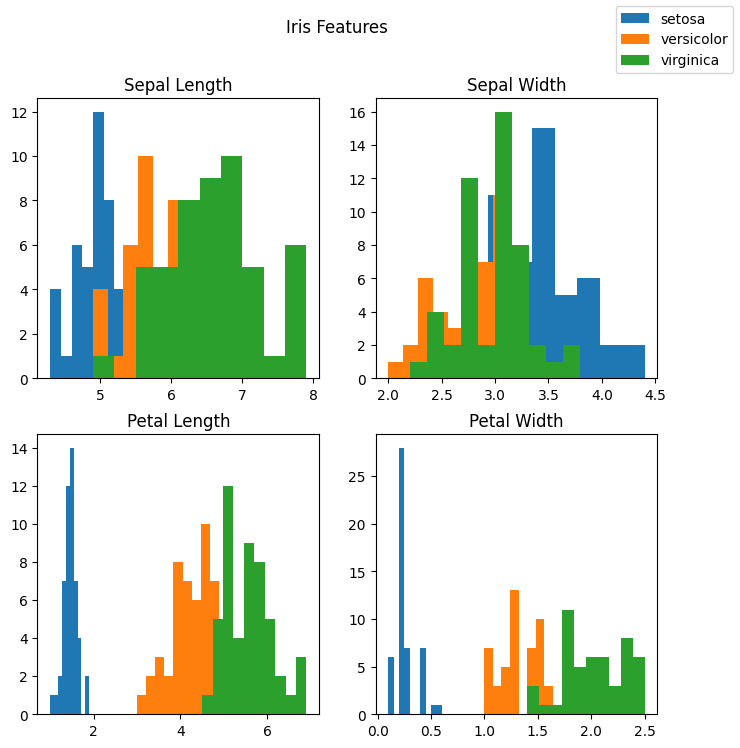

In [4]:
# Plot the histograms of the original features
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
legend_list = []
for species_name in iris_df["species"].unique():
    species_mask = iris_df["species"] == species_name
    species_df = iris_df[species_mask]
    ax[0, 0].hist(species_df["sepal_length"])
    ax[0, 1].hist(species_df["sepal_width"])
    ax[1, 0].hist(species_df["petal_length"])
    ax[1, 1].hist(species_df["petal_width"])
    ax[0, 0].set_title("Sepal Length")
    ax[0, 1].set_title("Sepal Width")
    ax[1, 0].set_title("Petal Length")
    ax[1, 1].set_title("Petal Width")
    legend_list.append(species_name)

fig.legend(legend_list)
fig.suptitle("Iris Features")

Text(0.5, 0.98, 'Iris Features')

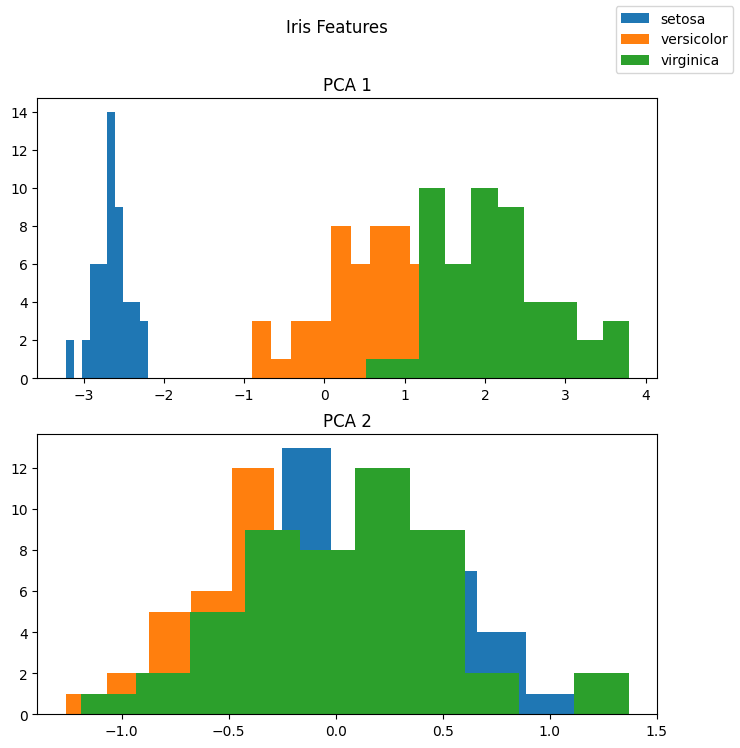

In [5]:
# Plot the histograms of the new features
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
legend_list = []
for species_name in iris_df["species"].unique():
    species_mask = iris_df["species"] == species_name
    species_df = iris_df[species_mask]
    ax[0].hist(species_df["PCA 1"])
    ax[1].hist(species_df["PCA 2"])
    ax[0].set_title("PCA 1")
    ax[1].set_title("PCA 2")
    legend_list.append(species_name)

fig.legend(legend_list)
fig.suptitle("Iris Features")

Text(0.5, 0.98, 'Iris Features')

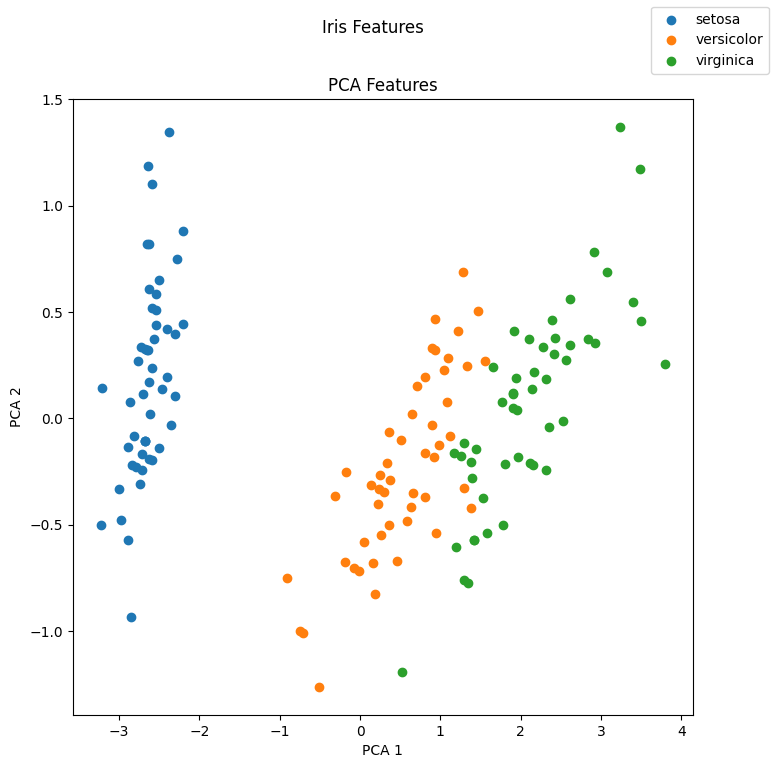

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
legend_list = []
for species_name in iris_df["species"].unique():
    species_mask = iris_df["species"] == species_name
    species_df = iris_df[species_mask]
    ax.scatter(species_df["PCA 1"], species_df["PCA 2"])
    ax.set_title("PCA Features")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    legend_list.append(species_name)

fig.legend(legend_list)
fig.suptitle("Iris Features")

## Run PCA with NumPy

Here we run PCA with NumPy to see what is happening under the hood. In this class we will use PCA as a tool, but it is still helpful to see what scikit-learn is doing.

In [7]:
# transform_matrix
n_samples, n_features = iris_features.shape

# Standardize the features
iris_features_normalized = iris_features - iris_features.mean(axis=0)

# Use NumPy's SVD directly to understand what PCA is doing under the hood
u_matrix, s_values, vh_matrix = np.linalg.svd(
    iris_features_normalized, full_matrices=True
)

# Reconstruct the s_matrix since svd() only returns the diagonal
s_matrix = np.zeros(iris_features_normalized.shape)
s_matrix[:n_features, :n_features] = np.diag(s_values)

print("Data shape")
print(iris_features.shape)

print("Factorization matrices shape:")
print(u_matrix.shape)
print(s_matrix.shape)
print(vh_matrix.shape)

Data shape
(150, 4)
Factorization matrices shape:
(150, 150)
(150, 4)
(4, 4)


In [8]:
# Reconstruct the data using the SVD matrices
reconstructed_iris_features = np.dot(u_matrix, np.dot(s_matrix, vh_matrix))

# Un-normalize the data
reconstructed_iris_features = reconstructed_iris_features + iris_features.mean(
    axis=0
)

np.allclose(reconstructed_iris_features, iris_features)

True

In [9]:
# reconstructed_iris_features

# pca_features[:, :1]
s_values

array([25.08986398,  6.00785254,  3.42053538,  1.87850234])